<a href="https://colab.research.google.com/github/min290/projects_data_science/blob/main/spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
pip install xgboost


In [3]:
from xgboost import XGBClassifier

In [4]:
from wordcloud import WordCloud

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


In [7]:
import pickle
import re

In [9]:
import pandas as pd
import zipfile

# Path to the ZIP file
zip_file = 'archive (7).zip'

# Specify the file you want to read
file_name = 'twitter_training.csv'

# Read the CSV directly from the ZIP
with zipfile.ZipFile(zip_file, 'r') as z:
    with z.open(file_name) as f:
        df = pd.read_csv(f)

# Display the first few rows
print(df.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [10]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [11]:
df.shape

(74681, 4)

In [12]:
df.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [13]:
df.isnull().sum()

,0
2401,0
Borderlands,0
Positive,0
"im getting on borderlands and i will murder you all ,",686


In [14]:
df.duplicated().sum()

np.int64(2700)

In [15]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [16]:
df = df.rename(columns={'2401':'num','Borderlands':'country','Positive':'rating','im getting on borderlands and i will murder you all ,':'reviews'})

In [17]:
df.head()


,num,country,rating,reviews
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [18]:
df['reviews'] = df['reviews'].astype(str)

df['length'] = df['reviews'].apply(len)

df.head()

,num,country,rating,reviews,length
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53


In [19]:
df.dtypes

,0
num,int64
country,object
rating,object
reviews,object
length,int64


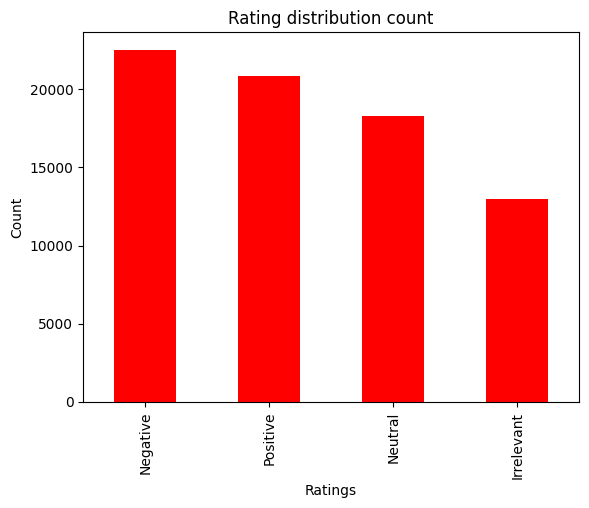

In [20]:
df['rating'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

0

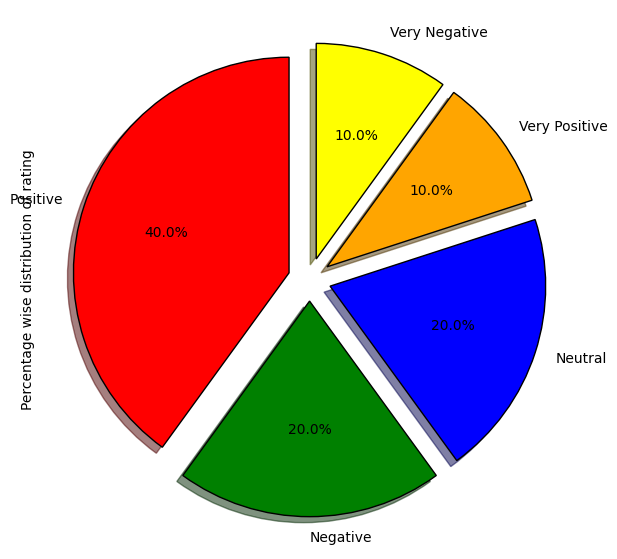

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from io import BytesIO
data = pd.DataFrame({'rating': ['Positive', 'Negative', 'Neutral', 'Very Positive', 'Very Negative', 'Positive', 'Neutral', 'Positive', 'Negative', 'Positive']})


fig = plt.figure(figsize=(7, 7))
colors = ('red', 'green', 'blue', 'orange', 'yellow')
wp = {'linewidth': 1, "edgecolor": 'black'}
tags = data['rating'].value_counts() / data.shape[0]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distribution of rating')

graph = BytesIO()
fig.savefig(graph, format="png")
graph.seek(0)

In [22]:
df['country'].value_counts()

,count
country,
Microsoft,2400
MaddenNFL,2400
TomClancysRainbowSix,2400
LeagueOfLegends,2394
CallOfDuty,2394
Verizon,2382
CallOfDutyBlackopsColdWar,2376
ApexLegends,2376
Facebook,2370


<ipython-input-23-9f3561cb9fa7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['country'].value_counts().values, y = df['country'].value_counts().index, palette = 'viridis')


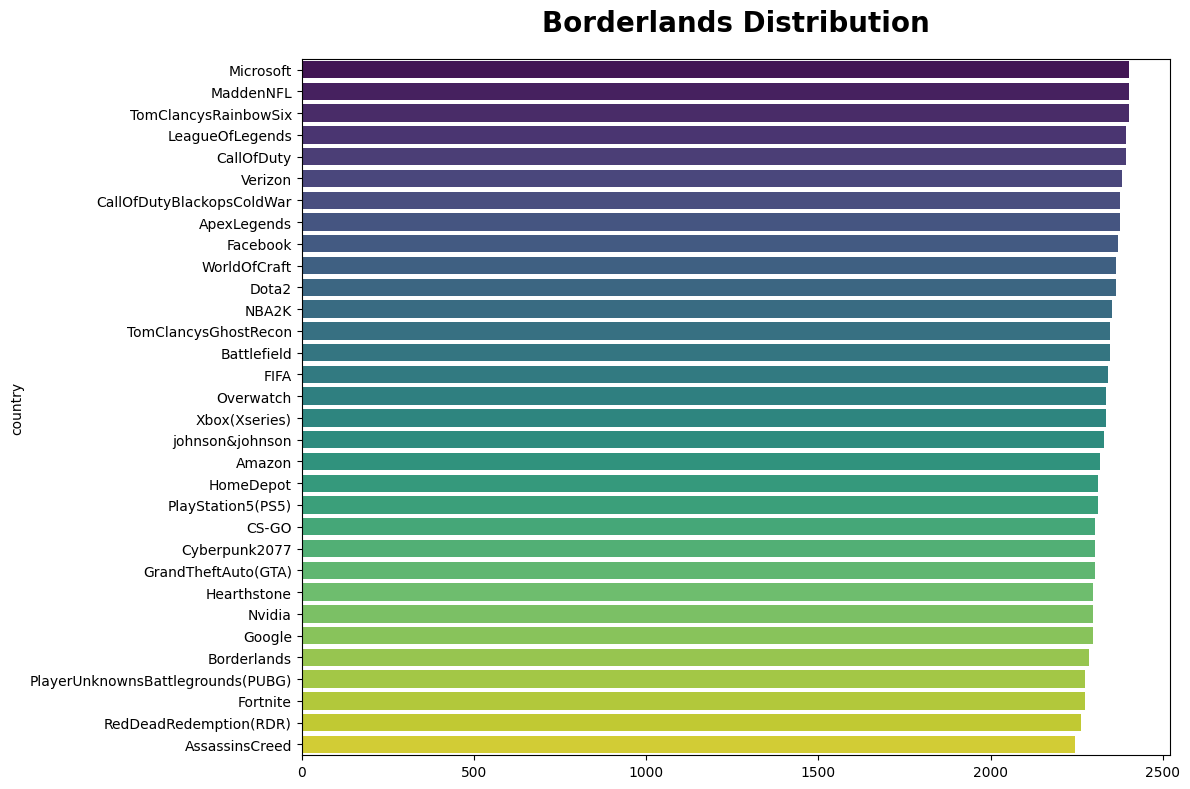

In [23]:
plt.figure(figsize = (12, 8))
sns.barplot(x = df['country'].value_counts().values, y = df['country'].value_counts().index, palette = 'viridis')
plt.title("Borderlands Distribution", fontweight = 'black', size = 20, pad = 20)

plt.tight_layout()
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [25]:
df['label']=encoder.fit_transform(df['rating'])

In [26]:
df.head()

,num,country,rating,reviews,length,label
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,3
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,3
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,3
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,3
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53,3


In [27]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [28]:
df['num_word']=df['reviews'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,num,country,rating,reviews,length,label,num_word
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,3,13
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,3,11
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,3,11
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,3,13
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53,3,11


In [30]:
df['num_sentence']=df['reviews'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,num,country,rating,reviews,length,label,num_word,num_sentence
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,3,13,1
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,3,11,1
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,3,11,1
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,3,13,1
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53,3,11,1


In [32]:
df[df['label']==3][['length','num_word','num_sentence']].describe()

,length,num_word,num_sentence
count,20831.000000,20831.000000,20831.000000
mean,95.138640,20.103980,1.886083
std,77.527495,16.792837,1.582560
min,1.000000,0.000000,0.000000
25%,35.000000,8.000000,1.000000
50%,74.000000,15.000000,1.000000
75%,133.000000,28.000000,2.000000
max,692.000000,198.000000,33.000000


In [33]:
df[df['label']==2][['length','num_word','num_sentence']].describe()

,length,num_word,num_sentence
count,18318.000000,18318.000000,18318.000000
mean,117.506660,23.761655,2.095152
std,77.955804,17.125534,1.883475
min,1.000000,0.000000,0.000000
25%,60.000000,12.000000,1.000000
50%,104.000000,20.000000,1.000000
75%,160.000000,33.000000,3.000000
max,957.000000,198.000000,31.000000


In [34]:
df[df['label']==1][['length','num_word','num_sentence']].describe()

,length,num_word,num_sentence
count,22542.000000,22542.000000,22542.000000
mean,110.401828,23.100523,1.809422
std,82.095795,17.439542,1.359893
min,1.000000,0.000000,0.000000
25%,45.000000,9.000000,1.000000
50%,90.000000,19.000000,1.000000
75%,160.000000,33.000000,2.000000
max,727.000000,198.000000,22.000000


In [35]:
df[df['label']==0][['length','num_word','num_sentence']].describe()


,length,num_word,num_sentence
count,12990.000000,12990.000000,12990.000000
mean,109.973980,22.901078,2.015319
std,79.378055,17.195425,1.725303
min,1.000000,0.000000,0.000000
25%,49.000000,10.000000,1.000000
50%,92.000000,18.000000,1.000000
75%,154.000000,32.000000,2.000000
max,692.000000,198.000000,25.000000


<Axes: xlabel='length', ylabel='Count'>

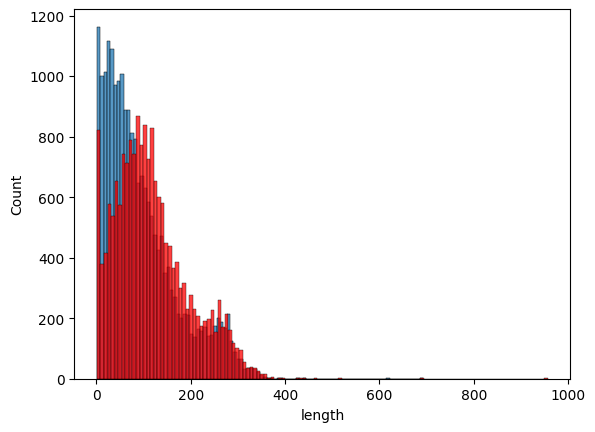

In [36]:
sns.histplot(df[df['label']==3]['length'])
sns.histplot(df[df['label']==2]['length'],color='red')


In [37]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [39]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df.reviews)

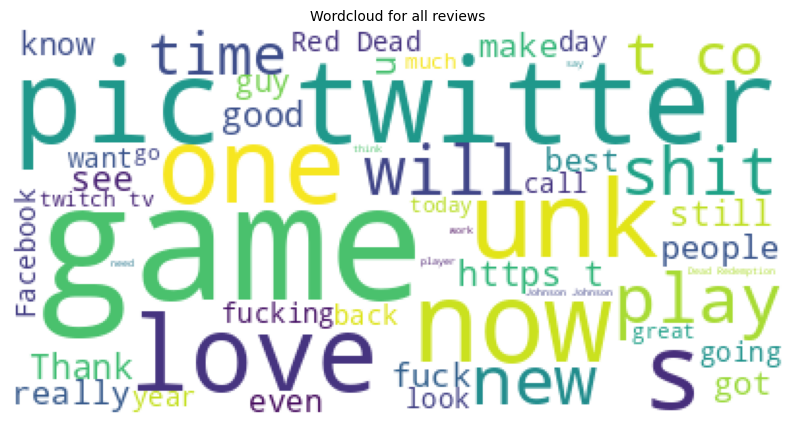

In [40]:
reviews = " ".join([review for review in df['reviews']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

model building

In [41]:
X = df['reviews']
y = df['label']

In [42]:
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [43]:
tfidf = TfidfVectorizer()

X_vectorized = tfidf.fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size = 0.2, random_state = 42)

In [45]:
X_train.shape

(59744, 31063)

In [46]:
y_train.shape

(59744,)

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
lr.score(X_train, y_train)

0.841088644884842

In [49]:
y_pred=lr.predict(X_test)

In [50]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7717747874405838

<Axes: >

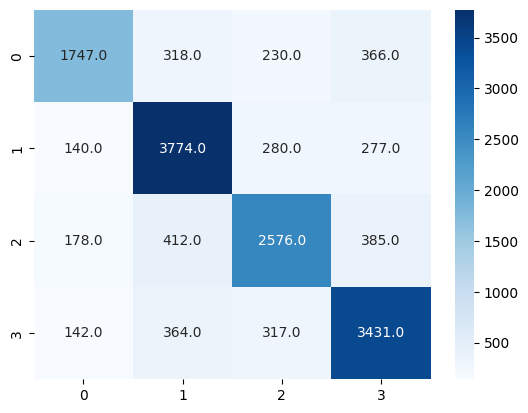

In [51]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,fmt ='0.1f', cmap = 'Blues')

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72      2661
           1       0.78      0.84      0.81      4471
           2       0.76      0.73      0.74      3551
           3       0.77      0.81      0.79      4254

    accuracy                           0.77     14937
   macro avg       0.77      0.76      0.76     14937
weighted avg       0.77      0.77      0.77     14937



In [58]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
dt.score(X_train, y_train)

0.9741061863952866

In [61]:
y_pred = dt.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7597911227154047

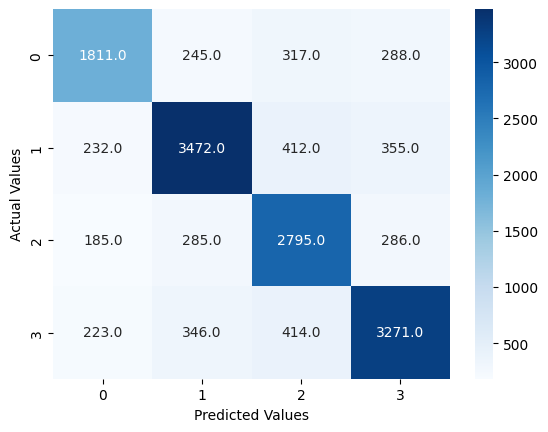

In [73]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,fmt ='0.1f', cmap = 'Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()



In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      2661
           1       0.80      0.78      0.79      4471
           2       0.71      0.79      0.75      3551
           3       0.78      0.77      0.77      4254

    accuracy                           0.76     14937
   macro avg       0.76      0.75      0.75     14937
weighted avg       0.76      0.76      0.76     14937



In [75]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
rf.score(X_train, y_train)

0.9741061863952866

In [77]:
y_pred = rf.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9151770770569726

<Axes: >

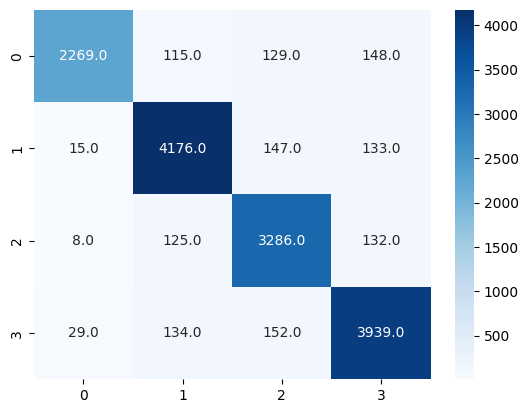

In [79]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,fmt ='0.1f', cmap = 'Blues')

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      2661
           1       0.92      0.93      0.93      4471
           2       0.88      0.93      0.90      3551
           3       0.91      0.93      0.92      4254

    accuracy                           0.92     14937
   macro avg       0.92      0.91      0.91     14937
weighted avg       0.92      0.92      0.92     14937

